In [234]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets


In [235]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Aggregate transaction data for clustering

In [236]:
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_quantity=('Quantity', 'mean'),
    total_purchases=('TransactionID', 'count')
).reset_index()

# Merge customer profile with transaction data


In [237]:
customer_profiles = customers.merge(customer_transactions, on='CustomerID', how='left').fillna(0)


# Features for clustering


In [238]:
features = ['total_spent', 'avg_quantity', 'total_purchases']
scaler = StandardScaler()
X = scaler.fit_transform(customer_profiles[features])

# Perform KMeans clustering


In [239]:
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=15)
customer_profiles['Cluster'] = kmeans.fit_predict(X)

# Evaluate clustering


In [240]:
db_index = davies_bouldin_score(X, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8494213001409965


# Visualize clusters


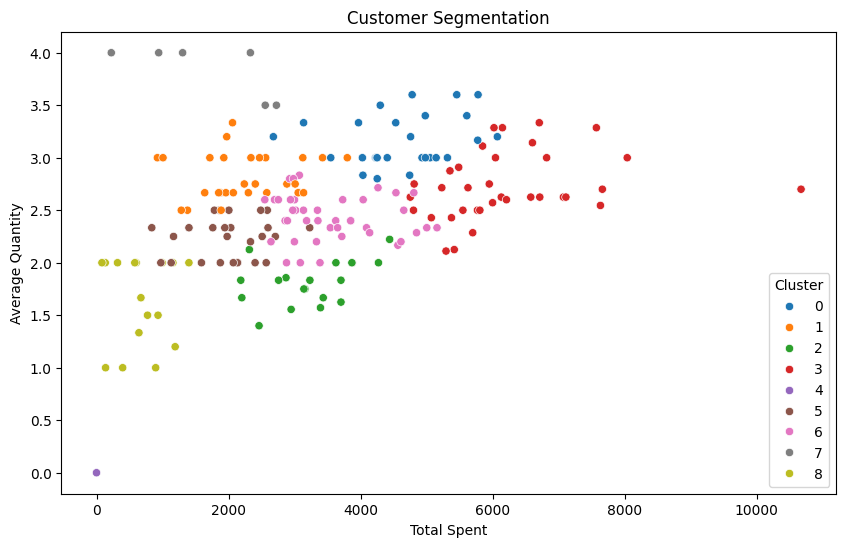

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_profiles['total_spent'], 
    y=customer_profiles['avg_quantity'], 
    hue=customer_profiles['Cluster'], 
    palette='tab10'
)
plt.title("Customer Segmentation")
plt.xlabel("Total Spent")
plt.ylabel("Average Quantity")
plt.legend(title="Cluster")
plt.show()

# Group the customer profiles by the cluster and get the data points in each cluster


In [242]:
cluster_data = customer_profiles.groupby('Cluster').agg(
    number_of_customers=('CustomerID', 'count'),
    avg_total_spent=('total_spent', 'mean'),
    avg_avg_quantity=('avg_quantity', 'mean'),
    avg_total_purchases=('total_purchases', 'mean')
).reset_index()

# Display the number of customers and average feature values for each cluster


In [243]:
print(cluster_data)


   Cluster  number_of_customers  avg_total_spent  avg_avg_quantity  \
0        0                   27      4629.683704          3.160494   
1        1                   29      2274.554828          2.817241   
2        2                   18      3206.668889          1.806834   
3        3                   35      6217.720857          2.725799   
4        4                    1         0.000000          0.000000   
5        5                   26      2004.816538          2.232051   
6        6                   42      3585.033333          2.415136   
7        7                    6      1680.646667          3.833333   
8        8                   16       681.951875          1.637500   

   avg_total_purchases  
0             5.000000  
1             3.068966  
2             7.166667  
3             8.114286  
4             0.000000  
5             3.730769  
6             5.309524  
7             2.166667  
8             1.875000  
